In [1]:
from tqdm import tqdm_notebook
import pathlib
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import nbimporter
# Import our data_modification.ipynb as Modify to use functions from it
import data_modification as Modify

C:\Users\Avdalim\Anaconda3\envs\Thesis\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Avdalim\Anaconda3\envs\Thesis\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Avdalim\Anaconda3\envs\Thesis\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Avdalim\Anaconda3\envs\Thesis\lib\

Importing Jupyter notebook from data_modification.ipynb


In [2]:
# Create Paths 
MODIFIED_ROOT_PATH = "F:/Thesis/rotated_data/"
Loadcase_Folder_id = 'Modified Data'
MODIFIED_DATA_PATH = os.path.join(MODIFIED_ROOT_PATH, Loadcase_Folder_id)
# The Path to safe the Modified Data to 
SPLIT_DATA_PATH = os.path.join("F:/Thesis/rotated_data/split")
os.makedirs(SPLIT_DATA_PATH, exist_ok=True)

In [ ]:
# Create the Folder for the Split Data and Get the PATHS of the Split Folders and Modified Folders
# FOLDER_PATHS, SPLIT_FOLDER_PATHS = Modify.loadcase_folder_paths(MODIFIED_DATA_PATH,SPLIT_DATA_PATH)
# Pass the Modified Folder Paths and get the Names and Paths of the different Data instances
# modified_data_names, modified_data_paths = Modify.get_data_names_paths(FOLDER_PATHS)
# So FOLDER_PATHS =  PATHS of the MODIFIED FOLDERS, SPLIT_FOLDER_PATHS = PATHS of SPLIT Folders
# MODIFIED_DATA_NAMES and _PATHS = all names and the PATHS of the modified data
# All Data is split into n with n being the Amount of Loadcase Subfolders, in this Case 1
# print(modified_data_names)




In [3]:
# Add a border for the Dataset, when we have a 64x48 Dimension
# Question is: will it work without problems?
def add_padding(array,x_offset=1,y_offset=0):
    x_shape_old = np.shape(array)[0]
    y_shape_old = np.shape(array)[1]
    x_new = x_shape_old+1
    y_new = y_shape_old+1
    new = np.zeros((x_new,y_new))
    new[x_offset:array.shape[0]+x_offset,y_offset:array.shape[1]+y_offset] = array
    return new


In [6]:
# Iteration Skip is the Amount of Iterations skipped from the 0-th Iteration in the Output
def split_data(MODIFIED_FOLDER_PATH, MODIFIED_DATA_NAMES,SPLIT_FOLDER_PATH,ITERATION_SKIP,padding = True):
    UNDER_ITERATION_SKIP = []
    # Check for the Checkpoint and Faulty data
    if all(x in MODIFIED_DATA_NAMES for x in ['checkpoint.npy', 'faulty.npy']):
        MODIFIED_DATA_NAMES = np.array(MODIFIED_DATA_NAMES[2:])
        print ("Checkpoint and Faulty found, skipping them, starting at: ", MODIFIED_DATA_NAMES)

    for i,s in tqdm_notebook(enumerate(MODIFIED_DATA_NAMES)):
# Loads the Modified Data
        modified_data = np.load(os.path.join(MODIFIED_FOLDER_PATH,s),allow_pickle=True)
        input_folder_path =os.path.join(SPLIT_FOLDER_PATH, 'Input')
        output_folder_path =os.path.join(SPLIT_FOLDER_PATH, 'Output')
        force_folder_path = os.path.join(SPLIT_FOLDER_PATH, 'Force_info')
        os.makedirs(input_folder_path, exist_ok=True)
        os.makedirs(output_folder_path, exist_ok=True)
        os.makedirs(force_folder_path, exist_ok=True)
        get_shape = np.shape(modified_data[6])
        get_shape = get_shape[1:]
        get_shape = np.insert(get_shape,0,1)
#         print(get_shape)
# Creates The Path and name for the split data Input and Output
        split_path_input= os.path.join(input_folder_path,s)
        split_path_output= os.path.join(output_folder_path,s)
        split_path_force = os.path.join(force_folder_path, s)
        if padding == True:
            modified_data[0] = add_padding(modified_data[0])
            modified_data[3] = add_padding(modified_data[3])
            modified_data[4] = add_padding(modified_data[4])
            modified_data[5] = add_padding(modified_data[5])
            np.save(split_path_input,[np.array(modified_data[0]),np.array(modified_data[1]),
                                      np.array(modified_data[2]),np.array(modified_data[3]),
                                      np.array(modified_data[4]),np.array(modified_data[5])])
        else:
#             Seperate into Channels 
            np.save(split_path_input,[np.array(modified_data[0]),np.array(modified_data[1]),
                                      np.array(modified_data[2]),np.array(modified_data[3]),
                                      np.array(modified_data[4]),np.array(modified_data[5])])
        if len(modified_data[6])>int(ITERATION_SKIP):
            np.save(split_path_output,np.reshape(modified_data[6][ITERATION_SKIP],get_shape) )
        else: 

            np.save(split_path_output,np.reshape(modified_data[6][-1],get_shape))
            Folder_info = str(MODIFIED_FOLDER_PATH)
            Iter_no = str(len(modified_data[6]))
            Data_name = str(s)
            Text = ["In Folder:",Folder_info,"Iteration Number",Iter_no,"Data Name:", Data_name] 
            UNDER_ITERATION_SKIP.append(Text)
        np.save(split_path_force,[np.array(modified_data[7]),np.array(modified_data[8]),
                                      np.array(modified_data[9])])

    np.save(os.path.join(SPLIT_FOLDER_PATH,"Under_Iteration.npy"),UNDER_ITERATION_SKIP)                    
#         np.save(split_path_output, np.reshape(modified_data[6][ITERATION_SKIP],(1,64,48)))
# print(FOLDER_PATHS)
# split_data(FOLDER_PATHS[0],modified_data_names[0],SPLIT_FOLDER_PATHS[0],150)        


In [7]:
def full_auto_split(MODIFIED_DATA_PATH,SPLIT_DATA_PATH,MAX_ITER=300):
    FOLDER_PATHS, SPLIT_FOLDER_PATHS = Modify.loadcase_folder_paths(MODIFIED_DATA_PATH,SPLIT_DATA_PATH)
    print(FOLDER_PATHS,SPLIT_FOLDER_PATHS)
    modified_data_names, modified_data_paths = Modify.get_data_names_paths(FOLDER_PATHS)
    for i,s in enumerate(FOLDER_PATHS):
        print(s)
        split_data(FOLDER_PATHS[i],modified_data_names[i],SPLIT_FOLDER_PATHS[i],MAX_ITER)
        
full_auto_split(MODIFIED_DATA_PATH,SPLIT_DATA_PATH)

['F:\\Thesis\\rotated_data\\Modified Data\\191119_LoadCases_4_1192_7812', 'F:\\Thesis\\rotated_data\\Modified Data\\191120_LoadCases_7813_7999', 'F:\\Thesis\\rotated_data\\Modified Data\\191128_LoadCases', 'F:\\Thesis\\rotated_data\\Modified Data\\LoadCases', 'F:\\Thesis\\rotated_data\\Modified Data\\LoadCases_1', 'F:\\Thesis\\rotated_data\\Modified Data\\LoadCases_2', 'F:\\Thesis\\rotated_data\\Modified Data\\test_set komplett'] ['F:/Thesis/rotated_data/split\\191119_LoadCases_4_1192_7812', 'F:/Thesis/rotated_data/split\\191120_LoadCases_7813_7999', 'F:/Thesis/rotated_data/split\\191128_LoadCases', 'F:/Thesis/rotated_data/split\\LoadCases', 'F:/Thesis/rotated_data/split\\LoadCases_1', 'F:/Thesis/rotated_data/split\\LoadCases_2', 'F:/Thesis/rotated_data/split\\test_set komplett']
F:\Thesis\rotated_data\Modified Data\191119_LoadCases_4_1192_7812



F:\Thesis\rotated_data\Modified Data\191120_LoadCases_7813_7999



F:\Thesis\rotated_data\Modified Data\191128_LoadCases



F:\Thesis\rotated_data\Modified Data\LoadCases



F:\Thesis\rotated_data\Modified Data\LoadCases_1



F:\Thesis\rotated_data\Modified Data\LoadCases_2



F:\Thesis\rotated_data\Modified Data\test_set komplett


In [ ]:
FOLDER_PATHS, SPLIT_FOLDER_PATHS = Modify.loadcase_folder_paths(MODIFIED_DATA_PATH,SPLIT_DATA_PATH)
modified_data_names, modified_data_paths = Modify.get_data_names_paths(FOLDER_PATHS)
print(FOLDER_PATHS,SPLIT_FOLDER_PATHS)

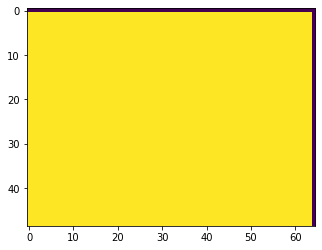

In [21]:
import matplotlib.pyplot as plt
a = np.load(r"F:\Thesis\rotated_data\split_rot\LoadCases_1\Input\LoadCase_0.npy",allow_pickle=True)
get_shape = np.shape(a)[1:]
plt.imshow(np.reshape(a[0],get_shape))